## Importing necessary modeules & Loading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
from numpy import percentile

%matplotlib inline
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', None)

In [2]:
df = pd.read_csv(r"E:\Datasets\bank_transactions.csv")
df = df.sample(n = 100000, random_state = 42)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
892845,T892846,C5725279,08-09-1984,M,JASPUR,84447.82,07-09-2016,183210,11858.0
444994,T444995,C4588538,02-01-1994,M,GURGAON,12549.49,16-08-2016,161300,250.0
614896,T614897,C2416476,14-11-1990,M,NEW DELHI,33607.65,26-08-2016,102007,3360.0
457036,T457037,C5940151,15-09-1990,M,HYDERABAD,38238.86,21-08-2016,110438,250.0
997441,T997442,C5922989,27-11-1988,M,PURBO MEDINIPUR,9506.85,14-09-2016,90810,33.0


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 892845 to 804143
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            100000 non-null  object 
 1   CustomerID               100000 non-null  object 
 2   CustomerDOB              99671 non-null   object 
 3   CustGender               99899 non-null   object 
 4   CustLocation             99992 non-null   object 
 5   CustAccountBalance       99783 non-null   float64
 6   TransactionDate          100000 non-null  object 
 7   TransactionTime          100000 non-null  int64  
 8   TransactionAmount (INR)  100000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 7.6+ MB


In [4]:
# checking for null values
df.isnull().sum()

TransactionID                0
CustomerID                   0
CustomerDOB                329
CustGender                 101
CustLocation                 8
CustAccountBalance         217
TransactionDate              0
TransactionTime              0
TransactionAmount (INR)      0
dtype: int64

In [5]:
def check(df):
    l = []
    columns = df.columns
    for col in columns:
        dtypes = df[col].dtypes
        nunique = df[col].nunique()
        sum_null = df[col].isnull().sum()
        l.append([col, dtypes, nunique, sum_null])
    df_check = pd.DataFrame(l)
    df_check.columns = ['column', 'dtypes','nunique', 'sum_null']
    return df_check
check(df)

,column,dtypes,nunique,sum_null
0,TransactionID,object,100000,0
1,CustomerID,object,98277,0
2,CustomerDOB,object,12527,329
3,CustGender,object,2,101
4,CustLocation,object,4358,8
5,CustAccountBalance,float64,59319,217
6,TransactionDate,object,54,0
7,TransactionTime,int64,50073,0
8,TransactionAmount (INR),float64,16909,0


In [6]:
# checking for duplicate values
df.duplicated().sum()

0

In [7]:
df['CustGender'].value_counts()

M    73107
F    26792
Name: CustGender, dtype: int64

In [8]:
df.dropna(inplace = True)
df.drop((df[df['CustGender'] == 'T']).index, inplace = True)

### Data Exploration Findings
Observed some missing values in certain columns.

There is one entry in CustGender column with value of 'T', so dropped it.

Also removed records conatining null values using dropna.

In [9]:
# converting type of columns transactiondate, customerdob, from object to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

In [10]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,99350.00,99350.00,99350.00
mean,114448.56,157151.06,1595.75
std,878115.09,51358.37,6302.30
min,0.00,1.00,0.00
25%,4740.49,124105.25,165.00
50%,16795.22,164348.50,460.00
75%,57144.82,200104.75,1198.00
max,115035495.10,235958.00,600008.32


In [11]:
# checking categorical columns
cat_col = ['CustGender', 'CustLocation']
for col in cat_col:
    print(f'Column: {col}')
    print(df[col].value_counts())
    print('\n')

Column: CustGender
M    72679
F    26671
Name: CustGender, dtype: int64


Column: CustLocation
MUMBAI                         9746
NEW DELHI                      8028
BANGALORE                      7686
GURGAON                        7057
DELHI                          6661
                               ... 
LOTUS BUS STOP WORLI MUMBAI       1
JEEDI METLA  HYDERABAD            1
AIT                               1
AMBEDKAR STATUE HYDERABAD         1
EAST SINGBHUM                     1
Name: CustLocation, Length: 4327, dtype: int64




* Data has more Male customers than Female
* Majority of customers are from Mumbai location

In [12]:
# analysing CustomerDOB column
df['CustomerDOB'].value_counts()

1800-01-01    5385
1989-01-01      81
1991-01-01      72
1987-01-01      68
1991-06-08      62
              ... 
1952-12-14       1
1977-12-22       1
1940-10-02       1
1971-02-08       1
1966-11-24       1
Name: CustomerDOB, Length: 12511, dtype: int64

In [13]:
df = df.drop(df[df['CustomerDOB'] == '1/1/1800'].index,axis = 0)
df.loc[df.CustomerDOB.dt.year >= 2023, 'CustomerDOB'] = df.loc[df.CustomerDOB.dt.year >= 2023, 'CustomerDOB'] - pd.DateOffset(years = 100)
df['CustomerAge'] = ((pd.to_datetime('today') - df['CustomerDOB']) / np.timedelta64(1,'Y')).round(0)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
892845,T892846,C5725279,1984-08-09,M,JASPUR,84447.82,2016-07-09,183210,11858.00,39.00
444994,T444995,C4588538,1994-02-01,M,GURGAON,12549.49,2016-08-16,161300,250.00,30.00
614896,T614897,C2416476,1990-11-14,M,NEW DELHI,33607.65,2016-08-26,102007,3360.00,33.00
457036,T457037,C5940151,1990-09-15,M,HYDERABAD,38238.86,2016-08-21,110438,250.00,33.00
997441,T997442,C5922989,1988-11-27,M,PURBO MEDINIPUR,9506.85,2016-09-14,90810,33.00,35.00


In [14]:
df['CustomerAge'].describe()

count   93965.00
mean       38.53
std         8.83
min         3.00
25%        33.00
50%        36.00
75%        42.00
max       100.00
Name: CustomerAge, dtype: float64

#### Handling outliers
* There were some outliers in CustomerDOB column
* DOB of some customers were 1800 and so on, so changed them

In [15]:
# creating backup
df1 = df.copy()

## Exploratory Data Analysis

### 1. Customer Demographics

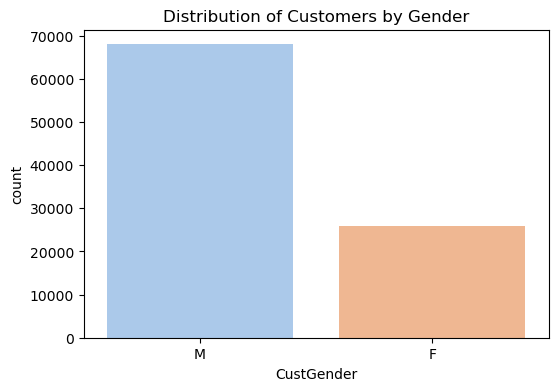

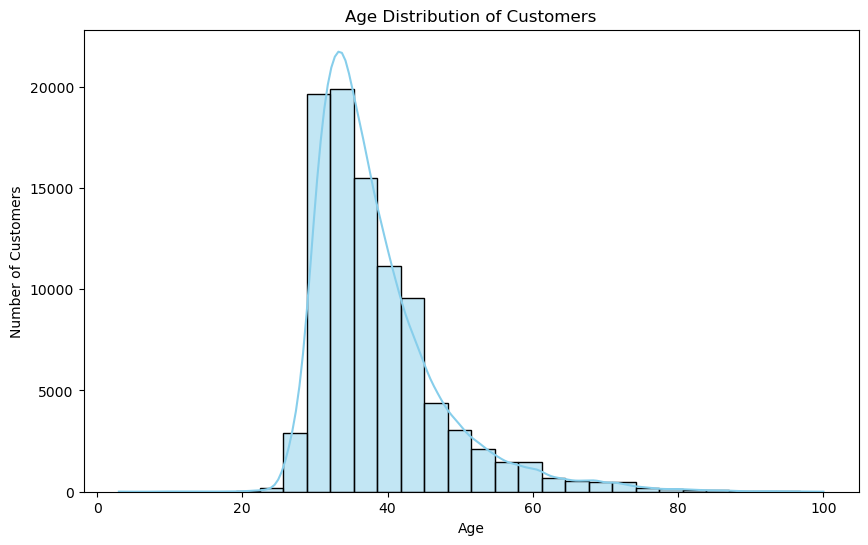

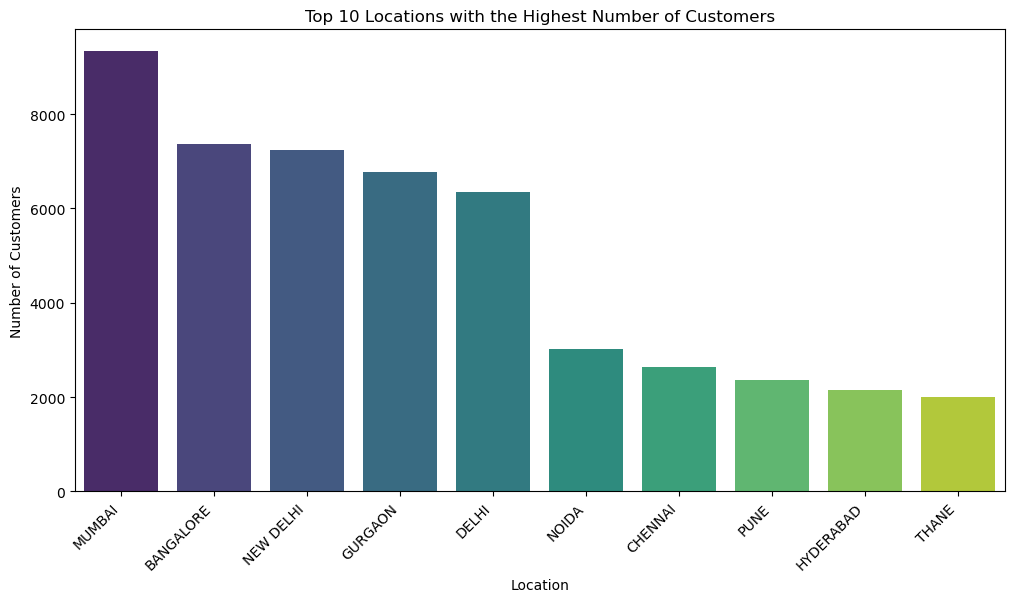

In [16]:
# 1. Distribution of customers by gender (CustGender)
plt.figure(figsize=(6, 4))
sns.countplot(x='CustGender',data = df1, palette='pastel')
plt.title('Distribution of Customers by Gender')
plt.show()

# 2. Age distribution of customers based on "CustomerDOB" column
plt.figure(figsize=(10, 6))
sns.histplot(df1['CustomerAge'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# 3. Location with the highest number of customers (CustLocation)
location_counts = df1['CustLocation'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Top 10 Locations with the Highest Number of Customers')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

* the plot shows distribution of customers by gender
* age distribution of customers based on DOB column
* shows the highest number of customers based on location

### 2. Customer Account and Transaction Analysis

In [17]:
df2 = df1.copy()

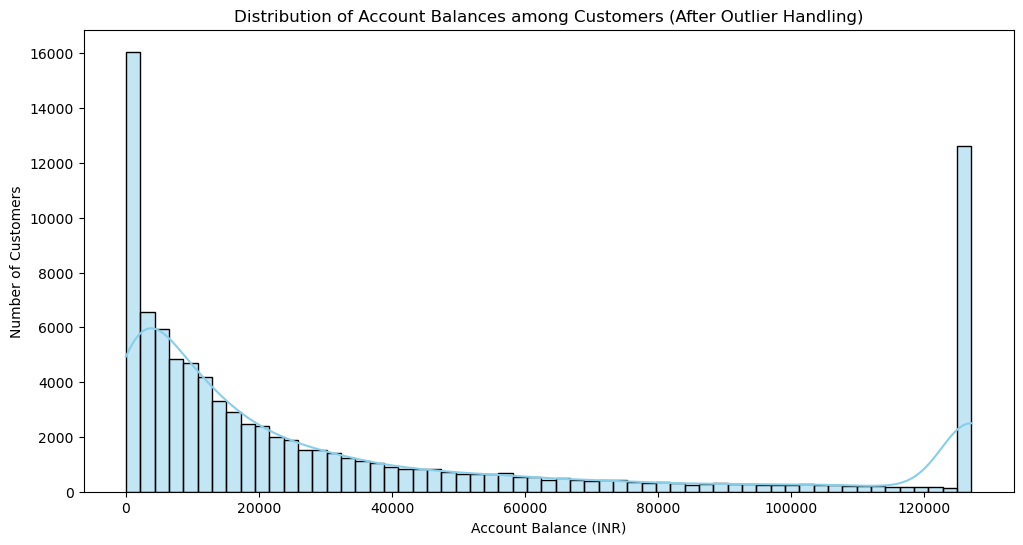

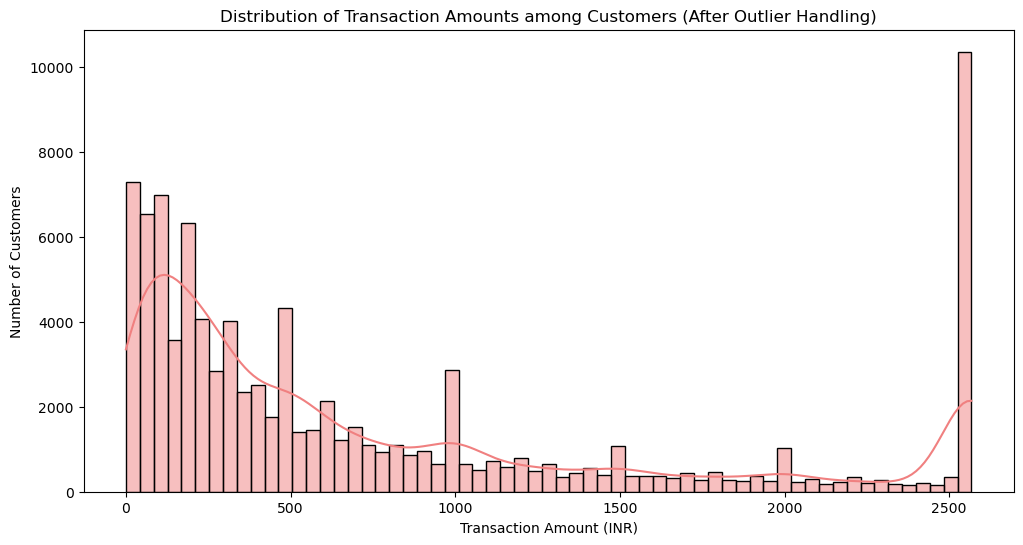

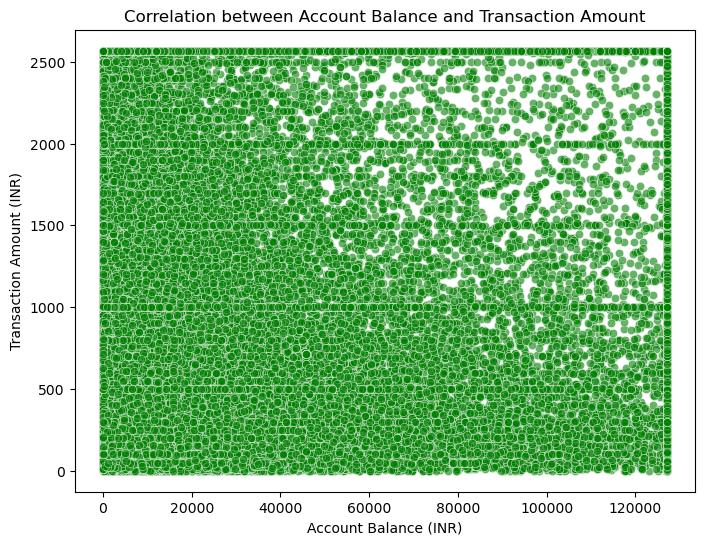

In [18]:
# Outlier Handling using IQR method
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
    return data

# Handling outliers for CustAccountBalance and TransactionAmount (INR) columns
df1 = handle_outliers_iqr(df1, 'CustAccountBalance')
df1 = handle_outliers_iqr(df1, 'TransactionAmount (INR)')

# Distribution of account balances (CustAccountBalance) among customers
plt.figure(figsize=(12, 6))
sns.histplot(df1['CustAccountBalance'], kde=True, color='skyblue')
plt.title('Distribution of Account Balances among Customers (After Outlier Handling)')
plt.xlabel('Account Balance (INR)')
plt.ylabel('Number of Customers')
plt.show()

# Distribution of transaction amounts (TransactionAmount (INR)) among customers
plt.figure(figsize=(12, 6))
sns.histplot(df1['TransactionAmount (INR)'], kde=True, color='lightcoral')
plt.title('Distribution of Transaction Amounts among Customers (After Outlier Handling)')
plt.xlabel('Transaction Amount (INR)')
plt.ylabel('Number of Customers')
plt.show()

# Correlation between customer account balance and transaction amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CustAccountBalance', y='TransactionAmount (INR)', data=df1, color='green', alpha=0.6)
plt.title('Correlation between Account Balance and Transaction Amount')
plt.xlabel('Account Balance (INR)')
plt.ylabel('Transaction Amount (INR)')
plt.show()

* shows the distribution of account balances (CustAccountBalance) amoung customers
* shows the distribution of transaction amounts (TransactionAmount(INR)).
* checkinf if there is any correlation between customer account balance and transaction balance

In [19]:
df1[['TransactionAmount (INR)', 'CustAccountBalance']].describe()

,TransactionAmount (INR),CustAccountBalance
count,93965.00,93965.00
mean,784.08,36766.43
std,833.39,43693.27
min,0.00,0.00
25%,155.00,4602.13
50%,436.05,16041.66
75%,1120.00,53580.00
max,2567.50,127046.81


### 3. Customer Location Analysis

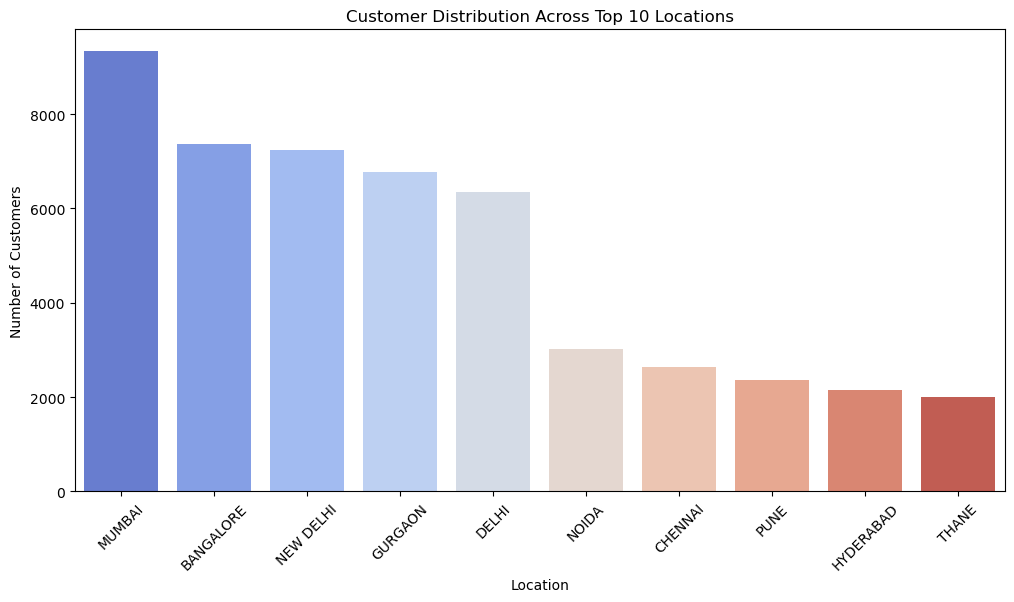

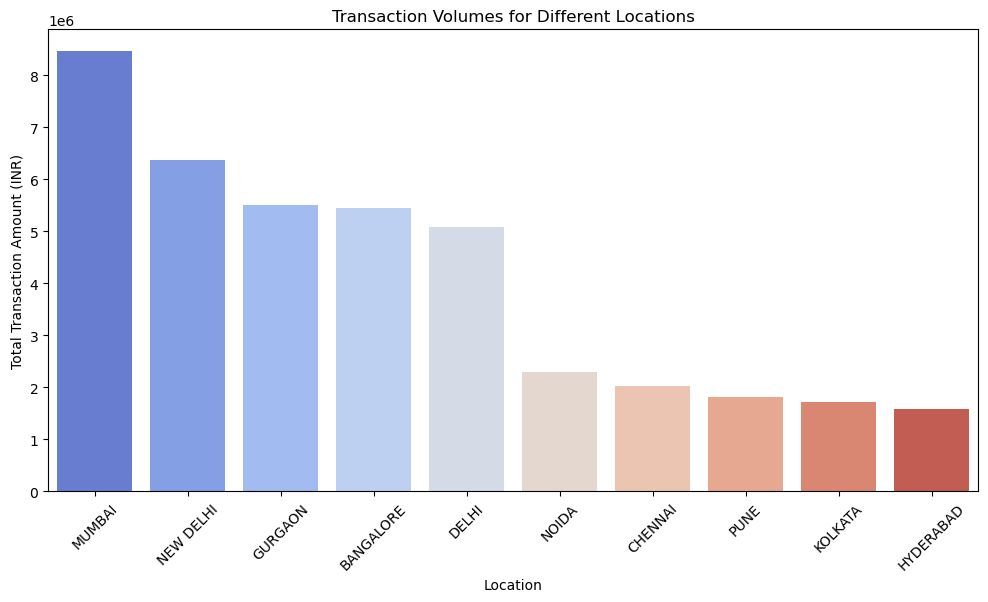

In [20]:
top_10_locations = df1['CustLocation'].value_counts().nlargest(10)

# Visualize customer distribution across top 10 locations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette='coolwarm')
plt.title('Customer Distribution Across Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

location_transaction_volumes = df1.groupby('CustLocation')['TransactionAmount (INR)'].sum().nlargest(10).sort_values(ascending = False)

# Visualize the transaction volumes for each location using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=location_transaction_volumes.index, y=location_transaction_volumes.values, palette='coolwarm')
plt.title('Transaction Volumes for Different Locations')
plt.xlabel('Location')
plt.ylabel('Total Transaction Amount (INR)')
plt.xticks(rotation=45)
plt.show()

* shows customer distributed across different locations
* locations compared with TransactionAmount

### 4. RFM analysis
* Recency(R) - The number of days since the customers most recent transaction.
* Frequency(F) - The total number of transactions made by each customer.
* Monetary(M) - The total monetary value of all transactions made by each customer.

In [21]:
df1['TransactionDate'] = pd.to_datetime(df1['TransactionDate'])

current_date = df1['TransactionDate'].max()
rfm_data = df1.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (current_date - x.max()).days,  # Recency calculation
    'TransactionID': 'count',  # Frequency calculation
    'TransactionAmount (INR)': 'sum'  # Monetary calculation
})

rfm_data.rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TransactionAmount (INR)': 'Monetary'
}, inplace=True)

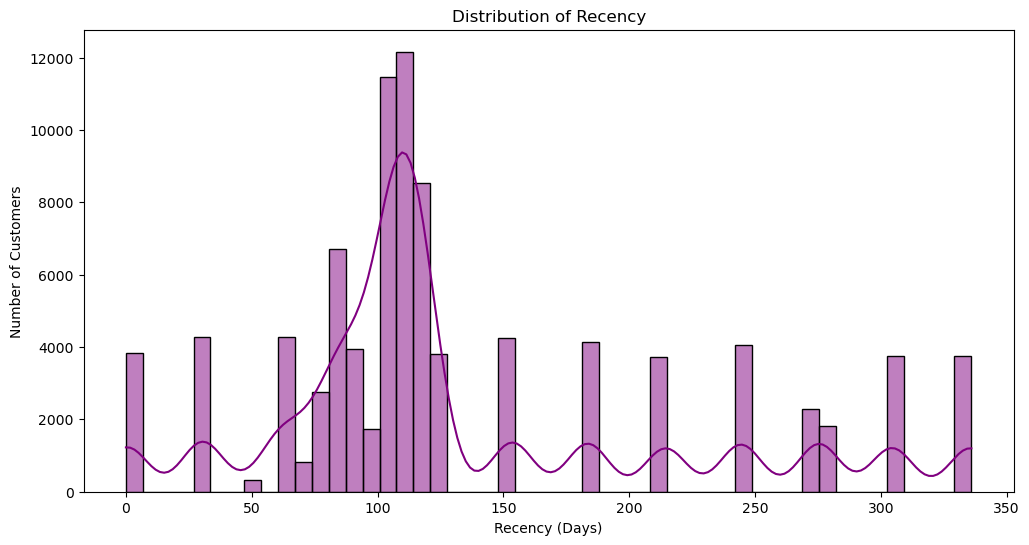

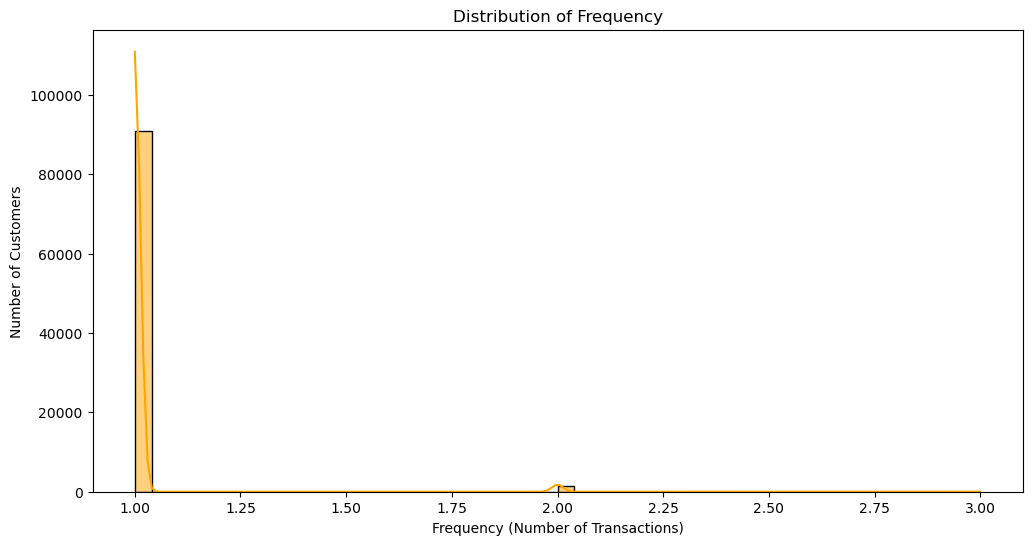

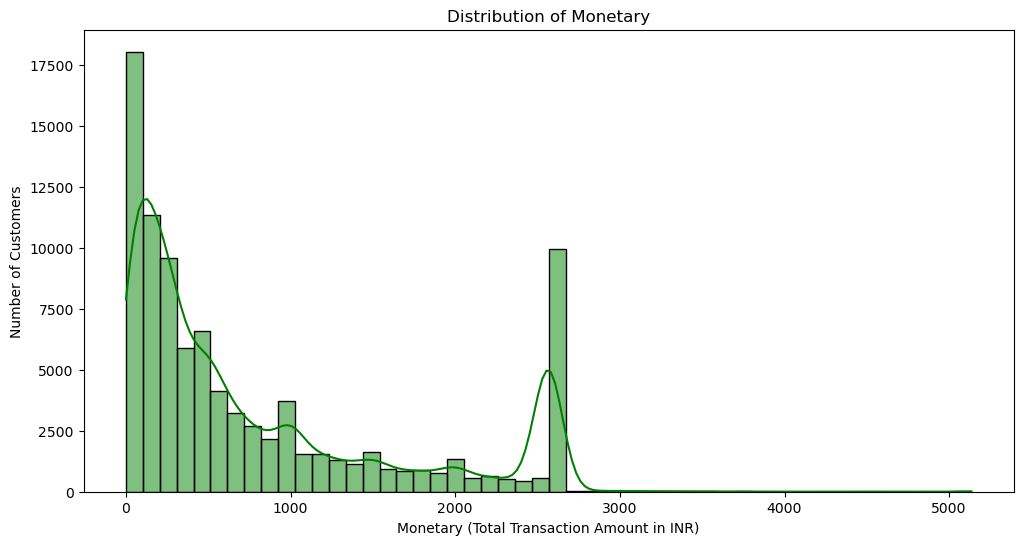

In [22]:
# Visualize the distributions of RFM features
plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['Recency'], bins=50, kde=True, color='purple')
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days)')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['Frequency'], bins=50, kde=True, color='orange')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency (Number of Transactions)')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(rfm_data['Monetary'], bins=50, kde=True, color='green')
plt.title('Distribution of Monetary')
plt.xlabel('Monetary (Total Transaction Amount in INR)')
plt.ylabel('Number of Customers')
plt.show()

* used RFM analysis to identify valuable customer segments and t understand how the features are distributed amoung customers

In [23]:
rfm_data.describe()

,Recency,Frequency,Monetary
count,92444.00,92444.00,92444.00
mean,135.55,1.02,796.98
std,82.27,0.13,846.92
min,0.00,1.00,0.00
25%,91.00,1.00,160.00
50%,111.00,1.00,449.00
75%,183.00,1.00,1150.00
max,336.00,3.00,5135.00


### Data Preprocessing

* using Label Encoder on gender and location column to convert into numerical data

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
  
df2['CustGender']= le.fit_transform(df2['CustGender'])
df2['CustLocation']= le.fit_transform(df2['CustLocation'])
df2.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
892845,T892846,C5725279,1984-08-09,1,1524,84447.82,2016-07-09,183210,11858.00,39.00
444994,T444995,C4588538,1994-02-01,1,1325,12549.49,2016-08-16,161300,250.00,30.00
614896,T614897,C2416476,1990-11-14,1,2437,33607.65,2016-08-26,102007,3360.00,33.00
457036,T457037,C5940151,1990-09-15,1,1443,38238.86,2016-08-21,110438,250.00,33.00
997441,T997442,C5922989,1988-11-27,1,2801,9506.85,2016-09-14,90810,33.00,35.00


In [25]:
# removing irrelevant columns
df2 = df2.drop(['TransactionID','CustomerID','CustomerDOB','TransactionDate','TransactionTime'],axis=1)
df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
892845,1,1524,84447.82,11858.00,39.00
444994,1,1325,12549.49,250.00,30.00
614896,1,2437,33607.65,3360.00,33.00
457036,1,1443,38238.86,250.00,33.00
997441,1,2801,9506.85,33.00,35.00


In [26]:
df2[df2['TransactionAmount (INR)'] == 0].count()

CustGender                 67
CustLocation               67
CustAccountBalance         67
TransactionAmount (INR)    67
CustomerAge                67
dtype: int64

In [27]:
df2 = df2.drop(df2[df2['TransactionAmount (INR)'] == 0].index,axis = 0)

In [28]:
from sklearn.preprocessing import StandardScaler

columns_names=['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge']
s = StandardScaler()
df2 = s.fit_transform(df2)
df2 = pd.DataFrame(df2,columns=columns_names)
df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge
0,0.62,-0.22,-0.02,1.79,0.05
1,0.62,-0.42,-0.11,-0.21,-0.97
2,0.62,0.70,-0.08,0.33,-0.63
3,0.62,-0.30,-0.08,-0.21,-0.63
4,0.62,1.07,-0.11,-0.25,-0.40


### Data Modelling

#### 1. KMeans Clustering

In [29]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [30]:
import random
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

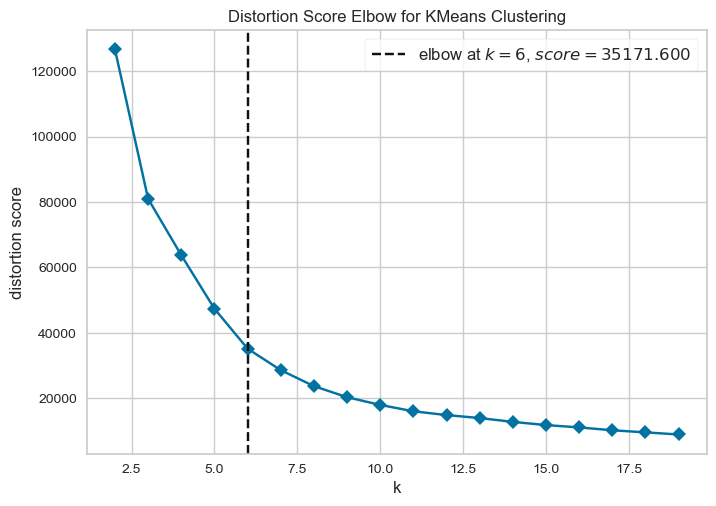

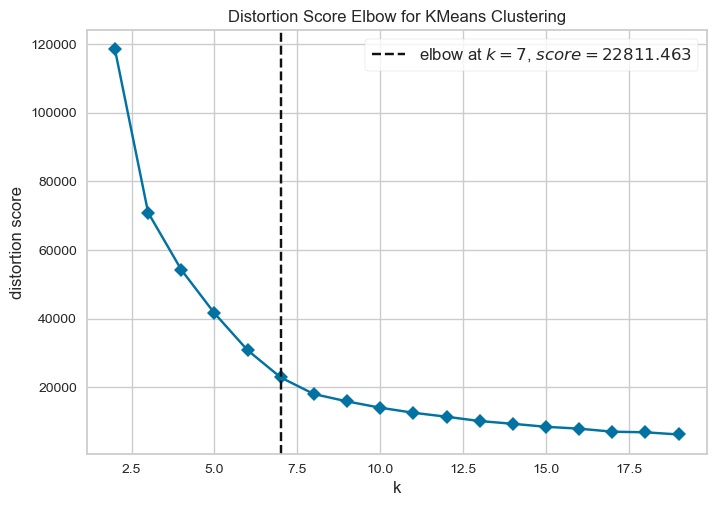

In [31]:
# Extract features from the DataFrame
X = df2[['CustomerAge', 'TransactionAmount (INR)']].values
Y = df2[['CustLocation', 'TransactionAmount (INR)']].values

# Function to perform KMeans clustering and plot the elbow method
def perform_elbow_method(X, k_range, title):
    model = KMeans(init='k-means++', random_state=42)
    visualizer = KElbowVisualizer(model, k=k_range, timings=False)
    visualizer.fit(X)
    plt.title(title)
    visualizer.show()
    
perform_elbow_method(X, k_range=(2, 20), title='Elbow Method for Customer Age Clustering')
perform_elbow_method(Y, k_range=(2, 20), title='Elbow Method for Customer Location Clustering')

* One subset consisted of 'Customer age' and 'TransactionAmount (INR)' as features (referred to as X), while the other subset contained 'CustLocation' and 'TransactionAmount (INR)' (referred to as Y).
* For X, we used the elbow method to determine the optimal number of clusters and found that 6 clusters provided the best fit. Similarly, for Y, 7 clusters were identified as the optimal number.

In [32]:
# Function to perform KMeans clustering and return the cluster labels and centroids
def perform_kmeans_clustering(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    cluster_centers = kmeans.cluster_centers_
    return cluster_labels, cluster_centers

x_cluster_labels, x_cluster_centers = perform_kmeans_clustering(X, num_clusters=6)
y_cluster_labels, y_cluster_centers = perform_kmeans_clustering(Y, num_clusters=7)

In [33]:
# Add cluster labels to the DataFrame
df2['cluster_age'] = x_cluster_labels
df2['cluster_location'] = y_cluster_labels

# Add centroids to the DataFrame
df2['cen_xx'] = df2.cluster_age.map({i: x_cluster_centers[i][0] for i in range(6)})
df2['cen_xy'] = df2.cluster_age.map({i: x_cluster_centers[i][1] for i in range(6)})
df2['cen_yx'] = df2.cluster_location.map({i: y_cluster_centers[i][0] for i in range(7)})
df2['cen_yy'] = df2.cluster_location.map({i: y_cluster_centers[i][1] for i in range(7)})

df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustomerAge,cluster_age,cluster_location,cen_xx,cen_xy,cen_yx,cen_yy
0,0.62,-0.22,-0.02,1.79,0.05,5,1,0.55,-0.02,-0.31,-0.08
1,0.62,-0.42,-0.11,-0.21,-0.97,1,1,-0.59,-0.12,-0.31,-0.08
2,0.62,0.70,-0.08,0.33,-0.63,1,5,-0.59,-0.12,0.66,-0.07
3,0.62,-0.30,-0.08,-0.21,-0.63,1,1,-0.59,-0.12,-0.31,-0.08
4,0.62,1.07,-0.11,-0.25,-0.40,1,5,-0.59,-0.12,0.66,-0.07


In [34]:
# Define colors for each cluster
colors_X = ['red', 'yellow', 'grey', 'green', 'blue', 'orange']
colors_Y = ['red', 'yellow', 'grey', 'green', 'blue', 'orange', 'pink']

# Add cluster colors to the DataFrame
df2['color_age_km'] = df2.cluster_age.map({i: colors_X[i] for i in range(6)})
df2['color_location_km'] = df2.cluster_location.map({i: colors_Y[i] for i in range(7)})

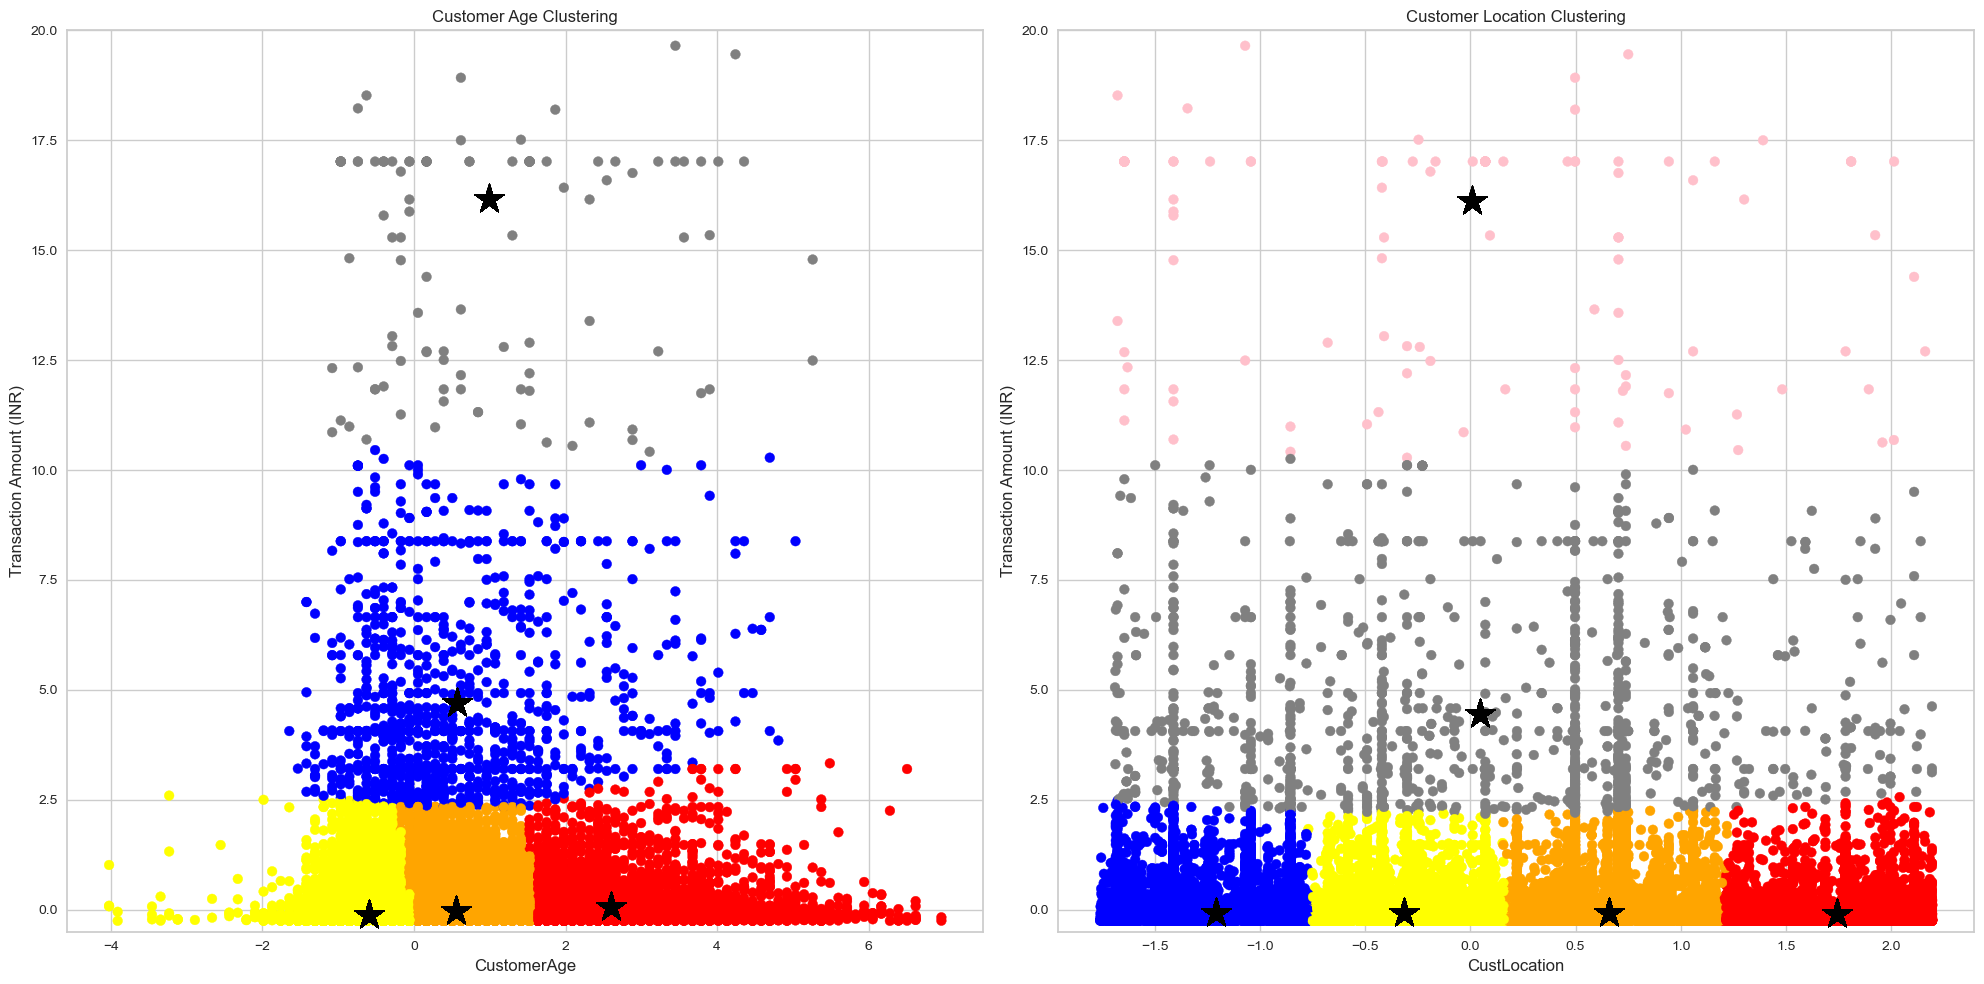

In [35]:
# Plot the scatter plot with cluster colors and centroids for 'Customer age' and 'TransactionAmount (INR)'
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(df2['CustomerAge'], df2['TransactionAmount (INR)'], c=df2.color_age_km)
plt.scatter(df2['cen_xx'], df2['cen_xy'], marker='*', s=500, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustomerAge')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Age Clustering')

# Plot the scatter plot with cluster colors and centroids for 'CustLocation' and 'TransactionAmount (INR)'
plt.subplot(1, 2, 2)
plt.scatter(df2['CustLocation'], df2['TransactionAmount (INR)'], c=df2.color_location_km)
plt.scatter(df2['cen_yx'], df2['cen_yy'], marker='*', s=500, c='black')
plt.ylim([-0.5, 20])
plt.xlabel('CustLocation')
plt.ylabel('Transaction Amount (INR)')
plt.title('Customer Location Clustering')

plt.tight_layout()  # Adjusts the spacing between the plots
plt.show()

### Evaluation of the Model
We will be using Silhouette Score for the task since it's a unsupervised method.
The Silhouette Score is a metric used to evaluate the quality of clustering results.
It measures how well-separated the clusters are and provides a numerical value between -1 and 1.

* A score close to 1 indicates that the data point is well-clustered and far away from other clusters, representing good separation.
* A score close to 0 suggests overlapping clusters or data points on the decision boundary between clusters.
* A negative score indicates that the data point might have been assigned to the wrong cluster.

In [36]:
from sklearn.metrics import silhouette_score

# Silhouette Score for cluster_age
silhouette_score_age = silhouette_score(df2[['TransactionAmount (INR)', 'CustomerAge']], df2['cluster_age'])
print("Silhouette Score for cluster_age:", silhouette_score_age)

# Silhouette Score for cluster_location
silhouette_score_location = silhouette_score(df2[['CustLocation','TransactionAmount (INR)']], df2['cluster_location'])
print("Silhouette Score for cluster_location:", silhouette_score_location)

Silhouette Score for cluster_age: 0.522722676907711
Silhouette Score for cluster_location: 0.5402121415164283


Silhouette Score for cluster_age: 0.516 The score of 0.516 suggests that the clusters are reasonably well-defined, with some overlap or ambiguity at the boundaries.

Silhouette Score for cluster_location: 0.540 The clusters are relatively well-defined, and the data points show clearer distinctions between clusters.
The clustering model has done a decent job in partitioning the data into meaningful groups, but there is still room for improvement. To further enhance the model, we may consider experimenting with different clustering algorithms, hyperparameter tuning that could better discriminate the clusters.

### Further Analysis

In [37]:
age_cluster_avg = df2.groupby('cluster_age').mean().reset_index()
location_cluster_avg = df2.groupby('cluster_location').mean().reset_index()

print("Cluster_Age") 
print(age_cluster_avg[['CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge']])
print("\n")
print("Cluster_Location")
print(location_cluster_avg[['CustLocation','CustAccountBalance','TransactionAmount (INR)','CustomerAge']])

Cluster_Age
   CustLocation  CustAccountBalance  TransactionAmount (INR)  CustomerAge
0          0.02                0.32                     0.06         2.61
1         -0.01               -0.06                    -0.12        -0.59
2         -0.00                0.87                    16.16         0.99
3          0.22               -0.07                    73.91         0.28
4          0.04                0.19                     4.69         0.58
5          0.01                0.04                    -0.02         0.55


Cluster_Location
   CustLocation  CustAccountBalance  TransactionAmount (INR)  CustomerAge
0          1.74               -0.03                    -0.09        -0.06
1         -0.31                0.01                    -0.08        -0.01
2          0.04                0.19                     4.43         0.64
3          0.22               -0.07                    73.91         0.28
4         -1.21               -0.03                    -0.09        -0.03
5      

### Cluster_Age

* Cluster 0 : middle-aged customers with moderate transaction activity.
* Cluster 1 : younger customers with low transaction activity and lower account balances.
* Cluster 2 : older customers who make substantial transactions and maintain higher account balances.
* Cluster 3 : diverse group of customers with moderate account balances and transaction amounts.
* Cluster 4 : financially stable customers who make sizeable transactions.
* Cluster 5 : younger customers who make large transactions.

### Cluster_Location

* Cluster 0 : diverse group of customers from specific locations.
* Cluster 1 : mixed group with moderate account balances and transaction amounts.
* Cluster 2 : younger customers from specific locations making significant transactions.
* Cluster 3 : younger customers from specific locations making substantial transactions.
* Cluster 4 : customers from various locations with lower account balances and transaction amounts.
* Cluster 5 : customers from specific locations who maintain higher account balances and make moderate transactions.
* Cluster 6 : older customers who make substantial transactions and maintain higher account balances.

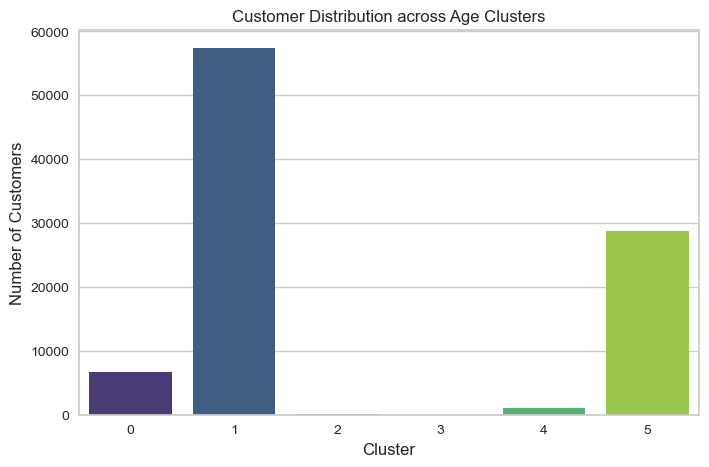

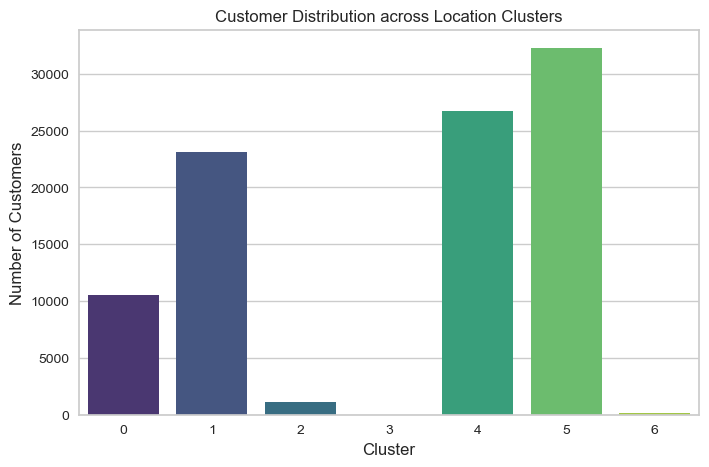

In [38]:
# Count the number of customers in each 'cluster_age_km' and 'cluster_location_km'
age_cluster_counts = df2['cluster_age'].value_counts().reset_index()
age_cluster_counts.columns = ['Cluster', 'Count']

location_cluster_counts = df2['cluster_location'].value_counts().reset_index()
location_cluster_counts.columns = ['Cluster', 'Count']

# Function to plot cluster distribution
def plot_cluster_distribution(cluster_counts, title):
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Cluster', y='Count', data=cluster_counts, palette='viridis')
    plt.title(title)
    plt.xlabel('Cluster')
    plt.ylabel('Number of Customers')
    plt.show()
    

plot_cluster_distribution(age_cluster_counts, title='Customer Distribution across Age Clusters')
plot_cluster_distribution(location_cluster_counts, title='Customer Distribution across Location Clusters')

The findings highlight the importance of understanding customer segments based on age and location.

* Cluster_Age : Cluster 1, consisting of younger customers with lower activity, might be a potential target for engagement and marketing strategies to increase their transaction involvement. Cluster 3, representing a diverse group of customers, requires a tailored approach to meet their varying needs.
* Cluser_Location : Additionally, the bank can focus on serving customers from clusters 5 and 4, which have distinct characteristics in terms of location and transaction behavior

### Conclusion
* Diverse Customer Landscape: includes clusters with younger customers having lower transaction activity (Cluster 1) to financially stable customers making sizeable transactions (Cluster 4).
* Youth Engagement Opportunity: Cluster 1, comprising younger customers with lower transaction activity, presents an opportunity for targeted marketing and engagement efforts.
* Location-Specific Strategies: clusters (Clusters 0, 4, and 5) highlight the importance of tailoring strategies to specific regions.
* High-Value Customers: Cluster 2 represents older customers who engage in substantial transactions and maintain higher account balances.

To optimize marketing efforts, the bank should focus on customer segments with higher representation, such as clusters 1 and 3 (age-based clusters) and clusters 5, 4, 1, and 0 (location-based clusters). Targeting these clusters can lead to effective customer engagement and better ROI on marketing campaigns.